## Dominion Capital Client Segmentation and Credit Risk Analysis

In [44]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

### A. Data Loading and Exploration

####  1. Extracting Dataset from File Path

In [45]:
# Defining the file path to the Excel File
file_path = r"C:\Users\hp\Desktop\Projects\Banking Client Segmentation and Credit Risk Analysis\Compiled_Dataset.xlsx"

# Defining the sheet name to read data from
sheet_name = 'vw_compiled_client_data'

# Reading the data from the specified sheet into a pandas DataFrame
df = pd.read_excel(file_path, sheet_name = sheet_name)

#### 2. Basic Data Overview

In [46]:
# Displaying data shape
print("Shape:", df.shape)

Shape: (3000, 29)


In [47]:
# Viewing all the list of columns
print(df.columns.tolist())

['Client_ID', 'Name', 'Age', 'Gender', 'Joined_Bank', 'Banking_Contact', 'City', 'Province', 'Latitude', 'Longitude', 'Nationality', 'Occupation', 'Occupation_Category', 'Fee_Structure', 'Loyalty_Classification', 'Estimated_Income', 'Superannuation_Savings', 'Amount_of_Credit_Cards', 'Credit_Card_Balance', 'Bank_Loans', 'Bank_Deposits', 'Checking_Accounts', 'Saving_Accounts', 'Foreign_Currency_Account', 'Business_Lending', 'Properties_Owned', 'Risk_Weighting', 'Investment_Advisor', 'Banking_Relationship']


In [48]:
# Viewing the data types 
print("Data types:\n", df.dtypes)

Data types:
 Client_ID                           object
Name                                object
Age                                  int64
Gender                              object
Joined_Bank                 datetime64[ns]
Banking_Contact                     object
City                                object
Province                            object
Latitude                           float64
Longitude                          float64
Nationality                         object
Occupation                          object
Occupation_Category                 object
Fee_Structure                       object
Loyalty_Classification              object
Estimated_Income                   float64
Superannuation_Savings             float64
Amount_of_Credit_Cards               int64
Credit_Card_Balance                float64
Bank_Loans                         float64
Bank_Deposits                      float64
Checking_Accounts                  float64
Saving_Accounts                    float6

In [49]:
# Displaying first 5 rows
print("Sample rows:\n", df.head())

Sample rows:
   Client_ID            Name  Age  Gender Joined_Bank Banking_Contact  \
0  C0012601   Justin Bishop   58  Female  2011-04-13    Bruce Butler   
1  C0012649   Timothy Kelly   77  Female  2016-11-05   Stephen Payne   
2  C0012660    Gregory Reed   61    Male  2009-12-26  James Castillo   
3  C0012702    Shawn Austin   65  Female  2020-03-03   Anthony Berry   
4  C0012704  Laura Lawrence   78    Male  2020-08-23      Shawn Long   

            City Province   Latitude   Longitude  ...    Bank_Loans  \
0       Winnipeg       MB  49.895138  -97.138374  ...  1.150087e+06   
1       Edmonton       AB  53.546124 -113.493820  ...  7.217880e+05   
2        Calgary       AB  51.044731 -114.071884  ...  2.700049e+05   
3  Charlottetown       PE  46.238239  -63.131069  ...  1.414317e+06   
4  Charlottetown       PE  46.238239  -63.131069  ...  5.827402e+05   

  Bank_Deposits Checking_Accounts Saving_Accounts Foreign_Currency_Account  \
0  1.056469e+06     215605.843750   251540.15625

In [50]:
# Viewing the Missing and Duplicates
print("Missing values per column:\n", df.isnull().sum())
print("Number of duplicate rows:", df.duplicated().sum())

Missing values per column:
 Client_ID                   0
Name                        0
Age                         0
Gender                      0
Joined_Bank                 0
Banking_Contact             0
City                        0
Province                    0
Latitude                    0
Longitude                   0
Nationality                 0
Occupation                  0
Occupation_Category         0
Fee_Structure               0
Loyalty_Classification      0
Estimated_Income            0
Superannuation_Savings      0
Amount_of_Credit_Cards      0
Credit_Card_Balance         0
Bank_Loans                  0
Bank_Deposits               0
Checking_Accounts           0
Saving_Accounts             0
Foreign_Currency_Account    0
Business_Lending            0
Properties_Owned            0
Risk_Weighting              0
Investment_Advisor          0
Banking_Relationship        0
dtype: int64
Number of duplicate rows: 0


#### 3. Summary Statistics for Numeric Fields

In [51]:
print("\n Descriptive statistics:\n", df.describe())


 Descriptive statistics:
                Age                 Joined_Bank     Latitude    Longitude  \
count  3000.000000                        3000  3000.000000  3000.000000   
mean     51.039667  2010-08-15 00:03:21.600000    47.986509   -88.551568   
min      17.000000         1995-01-03 00:00:00    43.651070  -123.365646   
25%      34.000000         2004-04-01 18:00:00    45.501690  -113.493820   
50%      51.000000         2011-02-18 00:00:00    47.561508   -79.347015   
75%      69.000000         2017-12-24 06:00:00    50.445210   -66.643112   
max      85.000000         2021-12-31 00:00:00    53.546124   -52.712578   
std      19.854760                         NaN     2.838606    23.431523   

       Estimated_Income  Superannuation_Savings  Amount_of_Credit_Cards  \
count       3000.000000             3000.000000             3000.000000   
mean      171305.034184            25531.599685                1.463667   
min        15919.480469             1482.030029                

#### 4. Distribution Plots for Financial & Risk Metrics

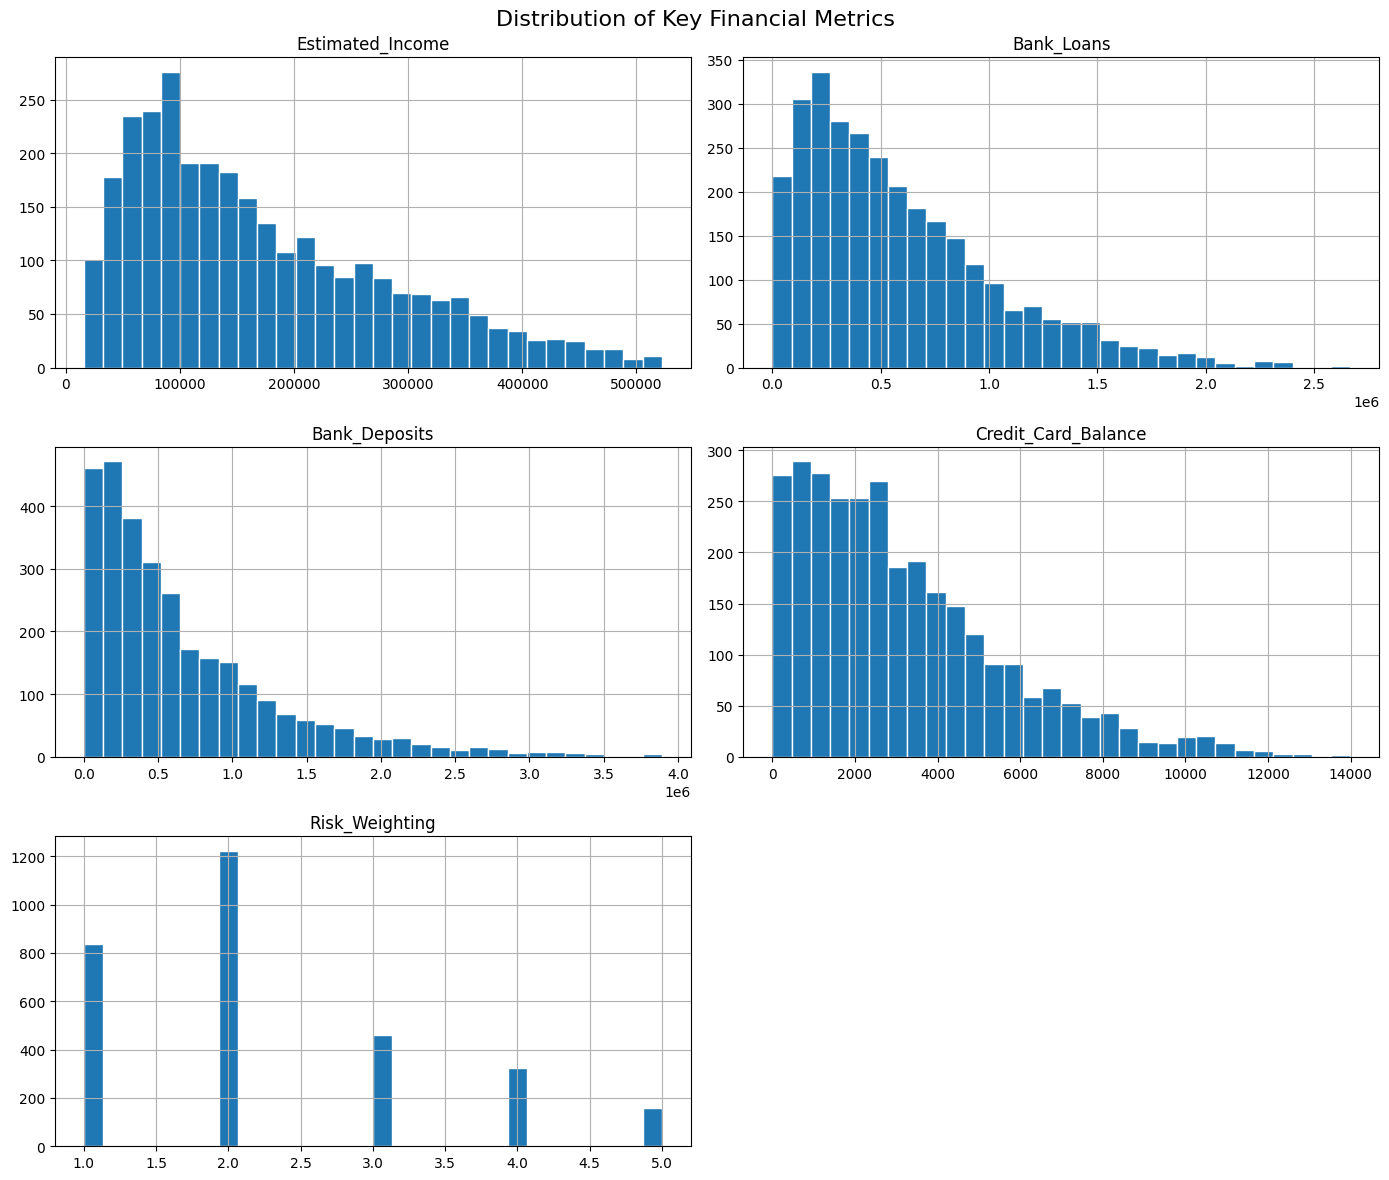

In [52]:
num_cols = ['Estimated_Income', 'Bank_Loans', 'Bank_Deposits', 'Credit_Card_Balance', 'Risk_Weighting']
df[num_cols].hist(figsize=(14, 12), bins=30, layout=(3, 2), edgecolor='white')
plt.suptitle("Distribution of Key Financial Metrics", fontsize=16)
plt.tight_layout()
plt.show()

#### 5. Distribution of Client by Gender

In [53]:
print(f"\nCount by Gender:")
print(df['Gender'].value_counts())


Count by Gender:
Gender
Female    1512
Male      1488
Name: count, dtype: int64


#### 6. Bar Charts for Categorical Distributions

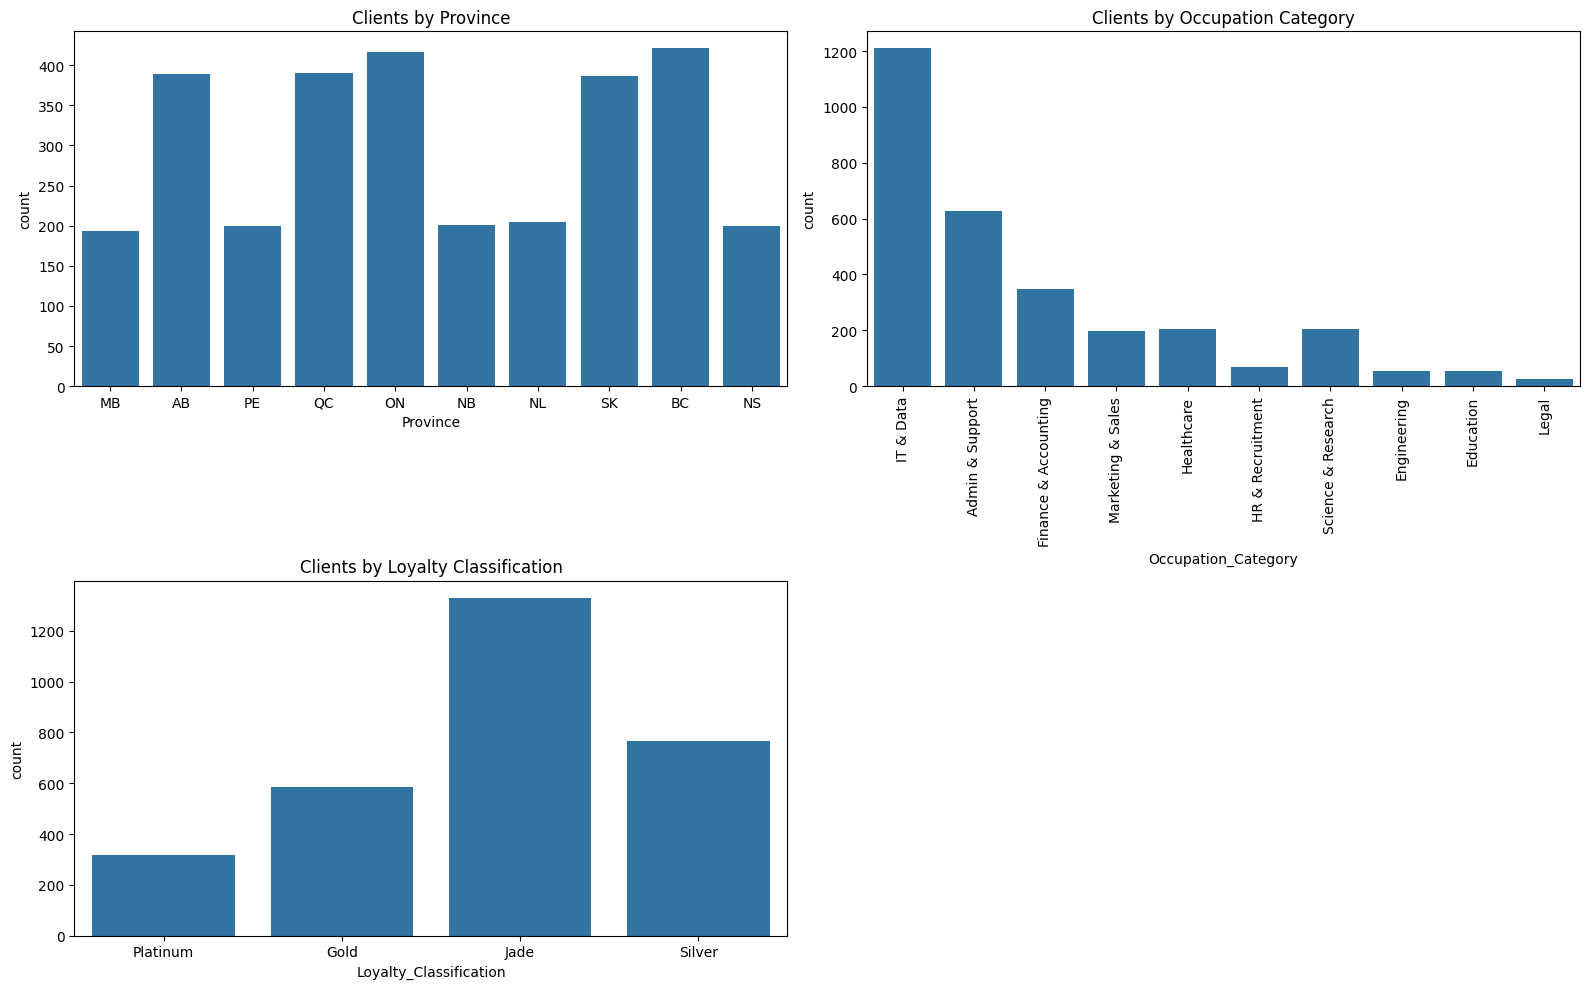

In [54]:
# Create 2x2 subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # Adjust size as needed

# Plot 1: Clients by Province
sns.countplot(data=df, x='Province', ax=axes[0, 0])
axes[0, 0].set_title("Clients by Province")
axes[0, 0].tick_params(axis='x')

# Plot 2: Clients by Occupation Category
sns.countplot(data=df, x='Occupation_Category', ax=axes[0, 1])
axes[0, 1].set_title("Clients by Occupation Category")
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot 3: Clients by Loyalty Classification
sns.countplot(data=df, x='Loyalty_Classification', ax=axes[1, 0])
axes[1, 0].set_title("Clients by Loyalty Classification")
axes[1, 0].tick_params(axis='x')

# Hide the empty 4th subplot
axes[1, 1].axis('off')

# Tight layout for spacing
plt.tight_layout()
plt.show()

#### 7. Correlation Heatmap with Relevant Financial & Risk Variables

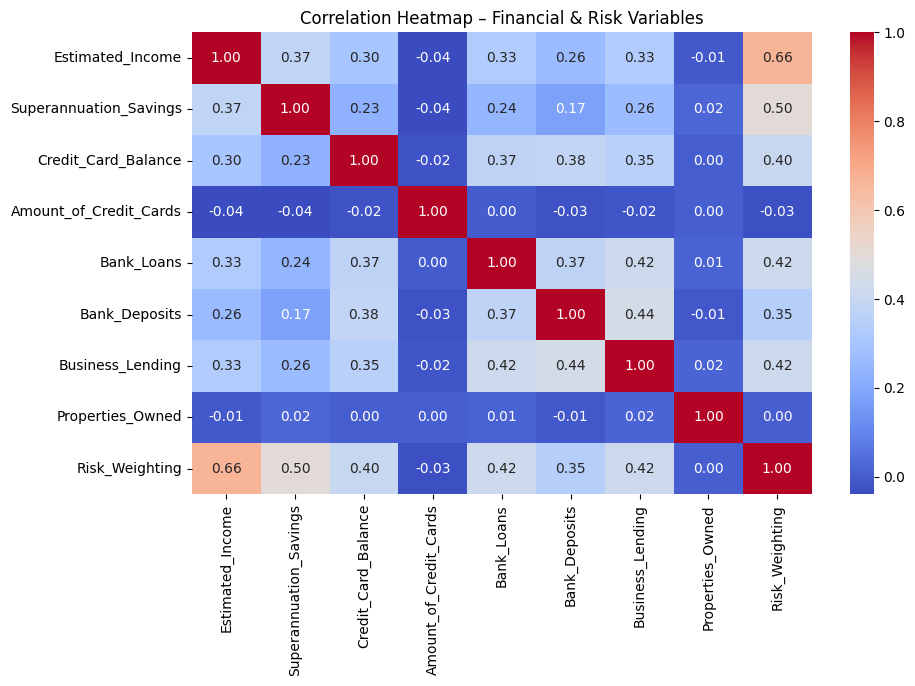

In [55]:
# Define a list of numeric columns relevant to financial/risk analysis
relevant_numeric_cols = ['Estimated_Income','Superannuation_Savings','Credit_Card_Balance','Amount_of_Credit_Cards','Bank_Loans','Bank_Deposits',
    'Business_Lending','Properties_Owned','Risk_Weighting']

# Compute correlation only on these
plt.figure(figsize=(10, 6))
sns.heatmap(df[relevant_numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap – Financial & Risk Variables")
plt.show()

#### 8. Bivariate Analysis (Category vs Numeric)

<Axes: xlabel='Loyalty_Classification', ylabel='Estimated_Income'>

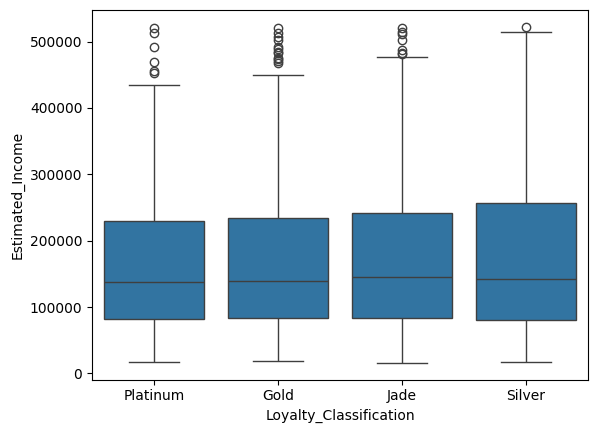

In [56]:
# Analyze how financial behavior varies across groups:

# Average income by province
df.groupby('Province')['Estimated_Income'].mean().sort_values(ascending=False)

# Boxplot of income by loyalty tier
sns.boxplot(data=df, x='Loyalty_Classification', y='Estimated_Income')

#### 9. Risk Profile Distribution

In [57]:
# Count of clients by risk level
df['Risk_Weighting'].value_counts().sort_index()

# Cross-tab of occupation vs risk
pd.crosstab(df['Occupation_Category'], df['Risk_Weighting'])

Risk_Weighting,1,2,3,4,5
Occupation_Category,,,,,
Admin & Support,177,250,100,62,40
Education,22,20,8,6,0
Engineering,17,18,7,7,6
Finance & Accounting,101,142,61,31,14
HR & Recruitment,24,27,9,6,3
Healthcare,56,90,29,16,15
IT & Data,330,499,183,136,62
Legal,6,8,6,3,1
Marketing & Sales,50,89,27,27,6


In [58]:
df.groupby('Province')[['Estimated_Income', 'Risk_Weighting']].mean()

,Estimated_Income,Risk_Weighting
Province,,
AB,175718.631236,2.275064
BC,173201.094186,2.199525
MB,170583.101805,2.274611
NB,177497.189113,2.323383
NL,169951.941006,2.248780
NS,172482.050928,2.270000
ON,172072.039471,2.271635
PE,164794.609650,2.110553
QC,173232.419521,2.279487


### B. Feature Engineering: Creating Financial, Risk & Segment Features

#### 1. Client Tenure in Years

In [59]:
df['Client_Tenure_Years'] = (pd.to_datetime("today") - df['Joined_Bank']).dt.days / 365
print("Client_Tenure_Years added:\n", df['Client_Tenure_Years'].describe())

Client_Tenure_Years added:
 count    3000.000000
mean       14.893144
std         7.796563
min         3.506849
25%         7.528082
50%        14.380822
75%        21.266438
max        30.517808
Name: Client_Tenure_Years, dtype: float64


#### 2. Total Lending = Bank Loans + Business Lending

In [60]:
df['Total_Lending'] = df['Bank_Loans'] + df['Business_Lending']
print("\n Total_Lending added:\n", df['Total_Lending'].describe())


 Total_Lending added:
 count    3.000000e+03
mean     1.458146e+06
std      9.302074e+05
min      5.552961e+04
25%      7.669453e+05
50%      1.222766e+06
75%      1.954659e+06
max      6.078478e+06
Name: Total_Lending, dtype: float64


#### 3. Liquidity Ratio = Bank Deposits / Total Lending (Bank Loans + Business Lending)

In [61]:
df['Total_Lending'] = df['Bank_Loans'] + df['Business_Lending']
df['Liquidity_Ratio'] = df['Bank_Deposits'] / df['Total_Lending']

# Replace infinite values with NaN (e.g., if Total_Lending is 0)
df['Liquidity_Ratio'] = df['Liquidity_Ratio'].replace([np.inf, -np.inf], np.nan)

# Summary of Liquidity Ratio
print("Liquidity Ratio:")
print(df['Liquidity_Ratio'].describe())

Liquidity Ratio:
count    3000.000000
mean        0.533695
std         0.603984
min         0.000000
25%         0.200514
50%         0.394340
75%         0.673805
max        11.117714
Name: Liquidity_Ratio, dtype: float64


#### 4. Risk Category

In [62]:
def map_risk_category(risk):
    if risk <= 1.5:
        return 'Low'
    elif risk <= 2.5:
        return 'Moderate'
    elif risk <= 3.5:
        return 'High'
    else:
        return 'Critical'

df['Risk_Category'] = df['Risk_Weighting'].apply(map_risk_category)
print(df['Risk_Category'].value_counts())

Risk_Category
Moderate    1222
Low          836
Critical     482
High         460
Name: count, dtype: int64


In [63]:
# Show final few rows of new dataset
df['Income_Tier'] = pd.qcut(df['Estimated_Income'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
print("\n📄 Sample of dataset with engineered features:\n")
print(df.head())


📄 Sample of dataset with engineered features:

  Client_ID            Name  Age  Gender Joined_Bank Banking_Contact  \
0  C0012601   Justin Bishop   58  Female  2011-04-13    Bruce Butler   
1  C0012649   Timothy Kelly   77  Female  2016-11-05   Stephen Payne   
2  C0012660    Gregory Reed   61    Male  2009-12-26  James Castillo   
3  C0012702    Shawn Austin   65  Female  2020-03-03   Anthony Berry   
4  C0012704  Laura Lawrence   78    Male  2020-08-23      Shawn Long   

            City Province   Latitude   Longitude  ... Business_Lending  \
0       Winnipeg       MB  49.895138  -97.138374  ...     3.207844e+06   
1       Edmonton       AB  53.546124 -113.493820  ...     6.434054e+05   
2        Calgary       AB  51.044731 -114.071884  ...     2.296982e+06   
3  Charlottetown       PE  46.238239  -63.131069  ...     1.239307e+06   
4  Charlottetown       PE  46.238239  -63.131069  ...     8.655512e+05   

  Properties_Owned Risk_Weighting Investment_Advisor Banking_Relationship 

### C. Deep-Dive EDA on Engineered Features

#### 1. Client Tenure in Years

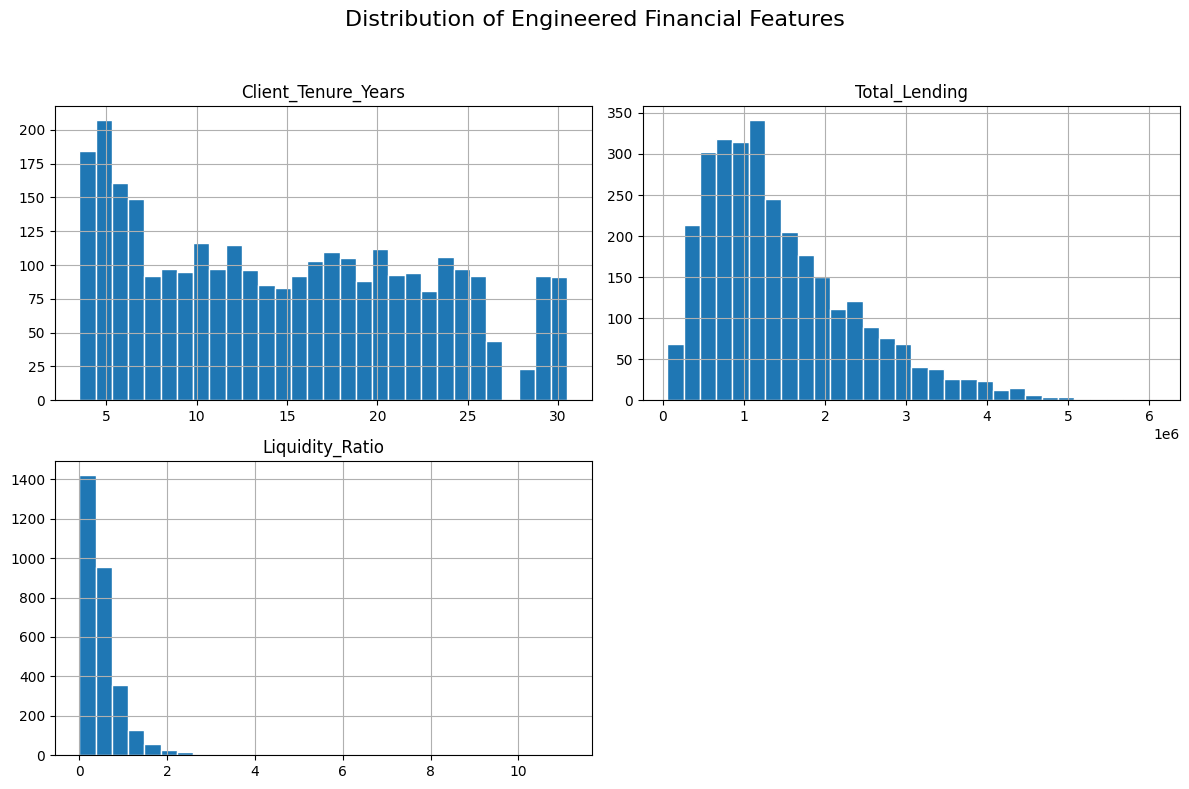

In [64]:
# Select engineered numeric columns
engineered_cols = ['Client_Tenure_Years', 'Total_Lending', 'Liquidity_Ratio']

# Plot in 2-per-row layout (2 rows, 2 columns to allow spacing)
df[engineered_cols].hist(
    figsize=(12, 8),
    bins=30,
    layout=(2, 2),  # 2 rows, 2 columns layout
    edgecolor='white')

plt.suptitle("Distribution of Engineered Financial Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Interpretation: Distribution of Engineered Financial Features
Client_Tenure_Years: This histogram shows the number of years each client has been with the bank. The distribution is slightly right-skewed, indicating that a large number of clients are relatively new (e.g., <5 years), while a smaller group has a much longer tenure (e.g., 10+ years). This suggests the bank is acquiring newer clients more actively in recent years, and may need strategies to retain them.

Total_Lending: This includes both Bank_Loans and Business_Lending. The distribution appears highly right-skewed, with most clients having relatively low total lending amounts, and a few outliers with very high lending. These outliers may represent commercial or high-risk borrowers. It also suggests segmentation may benefit from targeting low- vs. high-lending groups differently.

Liquidity_Ratio: Defined as total deposits divided by total lending. The majority of clients have a liquidity ratio greater than 1, meaning their deposits exceed their lending, which is generally a healthy sign. There are also many clients clustered just below 1, indicating tighter liquidity.
Some clients have very high ratios (outliers) — this could include wealthy individuals with little or no debt.

#### 2. Box/Bar Plots

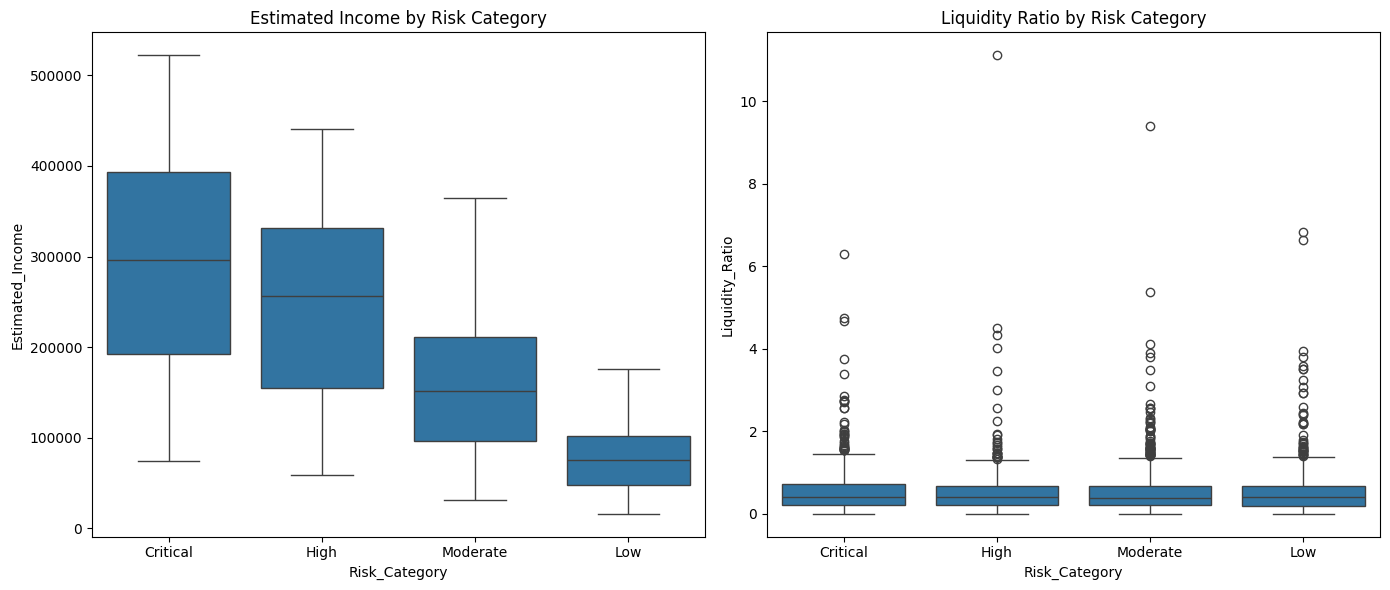

In [65]:
# Set up the subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot 1: Estimated Income by Risk Category
sns.boxplot(data=df, x='Risk_Category', y='Estimated_Income', ax=axes[0])
axes[0].set_title("Estimated Income by Risk Category")

# Boxplot 2: Liquidity Ratio by Risk Category
sns.boxplot(data=df, x='Risk_Category', y='Liquidity_Ratio', ax=axes[1])
axes[1].set_title("Liquidity Ratio by Risk Category")

# Adjust layout
plt.tight_layout()
plt.show()

#### Interpretation: Boxplots by Risk Category
Estimated Income by Risk Category: Clients classified as Low Risk generally have higher median incomes, with tighter income ranges. High Risk clients show a lower median income and a wider spread, indicating higher income variability. This supports the assumption that higher-income individuals tend to carry lower financial risk, while lower-income clients may be more volatile or financially stressed.

Liquidity Ratio by Risk Category: Low Risk clients exhibit higher liquidity ratios, meaning they maintain more deposits relative to their borrowing — a sign of financial discipline and safety. High Risk clients have lower liquidity ratios, often closer to or below 1, indicating higher exposure to debt relative to their savings. This pattern aligns with banking risk logic: lower liquidity implies higher dependence on credit and more potential default risk.

##### Overall Insight: 
Risk Category clearly correlates with both income and liquidity. These plots help validate the use of such features in client segmentation and risk modeling, and could directly support thresholds in scoring or eligibility decisions.

### D. Client Segmentation via KMeans

#### Step 1: Select and Scale Features

In [66]:
# Select relevant features for clustering
features = ['Estimated_Income', 'Bank_Deposits', 'Total_Lending', 'Client_Tenure_Years', 'Liquidity_Ratio']
X = df[features].copy()

# Handle any missing values (optional)
X = X.dropna()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Step 2: Apply KMeans

In [67]:
# Choose number of clusters (start with 3–5; tune later)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

#### Step 3: Visualize Cluster Profiles

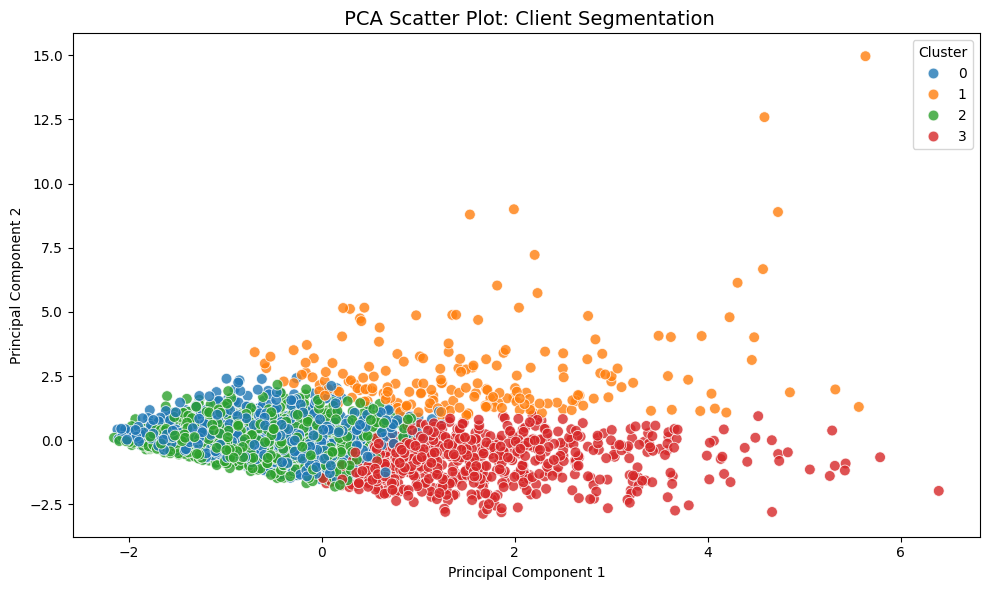

In [68]:
from sklearn.decomposition import PCA

# Run PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']

# Plotting the PCA scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=60, alpha=0.8)
plt.title(" PCA Scatter Plot: Client Segmentation", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

This PCA scatter plot is a visual summary of your KMeans-based client segmentation, reduced to 2D using Principal Component Analysis (PCA). Each point represents a client projected onto two synthetic dimensions (PCA1, PCA2) derived from the scaled financial variables. Colors indicate clusters/ segments found by the KMeans algorithm.

#### Why Use PCA Here?
Reduces complexity while retaining maximum variance.

Makes clusters visible in 2D — useful for validating whether segmentation meaningfully separates clients.

Complements numerical profiling of clusters for stakeholder-friendly interpretation.

In [69]:
# Add cluster back to the main dataframe
# Shift cluster labels to start from 1 instead of 0
df['Cluster'] = df['Cluster'] + 1


# Only apply mean and count to numerical features
cluster_profiles = df.groupby('Cluster')[features].agg(['mean', 'count'])
print(cluster_profiles)

        Estimated_Income       Bank_Deposits       Total_Lending        \
                    mean count          mean count          mean count   
Cluster                                                                  
1          133456.106058   988  4.086906e+05   988  1.112164e+06   988   
2          178618.540779   198  1.757850e+06   198  1.049366e+06   198   
3          133729.821577  1126  3.947938e+05  1126  1.103304e+06  1126   
4          285049.737787   688  1.189393e+06   688  2.653380e+06   688   

        Client_Tenure_Years       Liquidity_Ratio        
                       mean count            mean count  
Cluster                                                  
1                 22.404229   988        0.418271   988  
2                 15.410087   198        2.076617   198  
3                  8.428057  1126        0.401872  1126  
4                 14.539049   688        0.471155   688  


In [70]:
# Crosstab of Risk_Category per cluster
risk_by_cluster = pd.crosstab(df['Cluster'], df['Risk_Category'])
print("\nRisk Category Distribution by Cluster:\n")
print(risk_by_cluster)


Risk Category Distribution by Cluster:

Risk_Category  Critical  High  Low  Moderate
Cluster                                     
1                    80    95  384       429
2                    44    37   32        85
3                    86   117  419       504
4                   272   211    1       204


In [71]:
# Manual mapping of clusters
cluster_labels = {
    1: 'Premium Clients',
    2: 'High Risk - Credit Focused',
    3: 'Mass Market',
    4: 'Loyal but Low Liquidity'}

df['Cluster_Label'] = df['Cluster'].map(cluster_labels)

#### Cluster Interpretations (Client Segmentation - KMeans)
Cluster 1: High-Income, High-Deposit Clients: Clients in this cluster have high estimated incomes and substantial bank deposits, paired with strong liquidity ratios and longer tenure with the bank. They primarily fall into low-risk categories, indicating financial stability and disciplined financial behavior. This group represents premium or priority banking customers with long-term value potential.

Cluster 2: Low-Income, High Lending Clients: This segment includes clients with comparatively lower incomes but significant lending volumes. Their liquidity ratios are low, indicating that borrowing outweighs savings. These clients tend to fall into higher risk categories, making them potential candidates for credit monitoring and tighter lending controls. They may benefit from targeted financial education or restructuring programs.

Cluster 3: Mid-Income, Balanced Clients: This cluster represents a balanced segment with moderate income, average lending and deposits, and mid-range tenure. The liquidity position is steady, and the clients span across multiple risk categories. These are typical retail clients—neither too high-risk nor premium—but present an opportunity for standard banking services and upselling.

Cluster 4: Long-Tenure, Low Liquidity Clients: These clients have been associated with the bank for a long time but show relatively lower incomes and weaker liquidity ratios. Despite their loyalty, they may not be highly profitable or well-leveraged in terms of deposits or investments. Most belong to medium-risk categories and could benefit from retention strategies, personalized financial planning, or product re-engagement.

In [72]:
# Saving the results 
df.to_excel(r"C:\Users\hp\Desktop\Projects\Banking Client Segmentation and Credit Risk Analysis\Expanded_Dataset.xlsx")

### E. Risk Category Prediction & Classification

In [73]:
# Step 1: Make a working copy
df_model = df.copy()
df_model.drop(['Client_ID', 'Name', 'Joined_Bank'], axis=1, inplace=True)

In [74]:
# Step 2: Separate features and target
X = df_model.drop('Risk_Category', axis=1)
y = df_model['Risk_Category']

In [75]:
# Step 3: Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [76]:
# Step 4: Identify feature types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [77]:
# Step 5: Preprocessing Pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Use sparse_output instead of sparse
])

In [78]:
# Step 6: ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [79]:
# Step 7: Full Pipeline with Classifier
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [80]:
# Step 8: Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [81]:
# Step 9: Train the Model
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Latitude',
                                                   'Longitude',
                                                   'Estimated_Income',
                                                   'Superannuation_Savings',
                                                   'Amount_of_Credit_Cards',
                                                   'Credit_Card_Balance',
                                                   'Bank_Loans',
                                                   'Bank_Deposits',
                                                   'Checking_Accounts',
                                                   'Saving_Accounts',...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Banking_Contact',
                                                   'City', 'Province',
                                                   'Nationality', 'Occupation',
                                                   'Occupation_Category',
                                                   'Fee_Structure',
                                                   'Loyalty_Classification',
                                                   'Investment_Advisor',
                                                   'Banking_Relationship',
                                                   'Cluster_Label'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [82]:
# Step 10: Evaluate
y_pred = clf_pipeline.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    Critical       0.97      0.92      0.94        97
        High       0.97      0.85      0.91        92
         Low       1.00      1.00      1.00       167
    Moderate       0.93      1.00      0.97       244

    accuracy                           0.96       600
   macro avg       0.97      0.94      0.95       600
weighted avg       0.96      0.96      0.96       600

[[ 89   2   0   6]
 [  3  78   0  11]
 [  0   0 167   0]
 [  0   0   0 244]]


In [83]:
# Step 11: Add Prediction to Original Data
df_result = df.copy()
df_result["Risk_Category_Predicted"] = le.inverse_transform(clf_pipeline.predict(X))
print("\n📄 Sample of dataset with engineered features:\n")
print(df.head())


📄 Sample of dataset with engineered features:

  Client_ID            Name  Age  Gender Joined_Bank Banking_Contact  \
0  C0012601   Justin Bishop   58  Female  2011-04-13    Bruce Butler   
1  C0012649   Timothy Kelly   77  Female  2016-11-05   Stephen Payne   
2  C0012660    Gregory Reed   61    Male  2009-12-26  James Castillo   
3  C0012702    Shawn Austin   65  Female  2020-03-03   Anthony Berry   
4  C0012704  Laura Lawrence   78    Male  2020-08-23      Shawn Long   

            City Province   Latitude   Longitude  ... Risk_Weighting  \
0       Winnipeg       MB  49.895138  -97.138374  ...              4   
1       Edmonton       AB  53.546124 -113.493820  ...              3   
2        Calgary       AB  51.044731 -114.071884  ...              4   
3  Charlottetown       PE  46.238239  -63.131069  ...              2   
4  Charlottetown       PE  46.238239  -63.131069  ...              2   

  Investment_Advisor Banking_Relationship Client_Tenure_Years Total_Lending  \
0      

In [84]:
# Step 12: Exporting the final dataset
df_result.to_excel(r"C:\Users\hp\Desktop\Projects\Banking Client Segmentation and Credit Risk Analysis\Risk_Prediction_Output.xlsx")

### F. Feature Importance Analysis

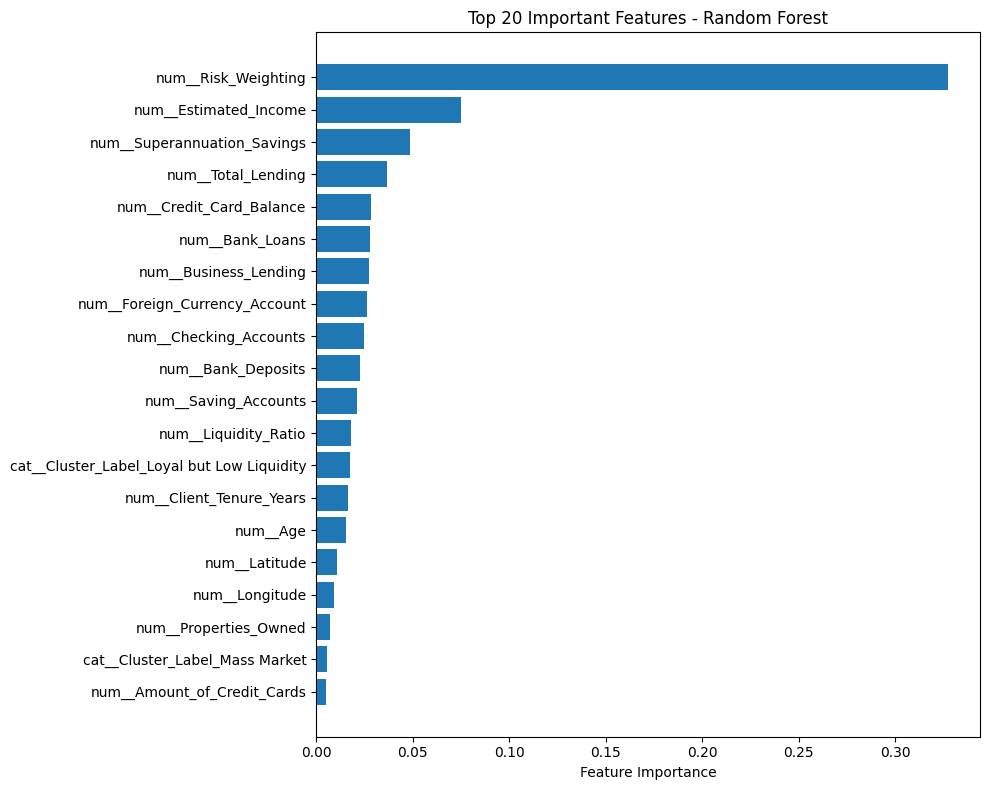

In [85]:
# Get feature names after one-hot encoding
encoded_feature_names = clf_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Get feature importances from the trained Random Forest model
importances = clf_pipeline.named_steps['classifier'].feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]
top_n = 20  # Top N important features

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(top_n), importances[indices[:top_n]][::-1])
plt.yticks(range(top_n), [encoded_feature_names[i] for i in indices[:top_n]][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features - Random Forest")
plt.tight_layout()
plt.show()

#### Interpretation
The feature importance chart reveals that Risk_Weighting is the most influential factor in predicting a client's risk category, followed by key financial indicators like Estimated_Income, Superannuation_Savings, and Total_Lending. Credit exposure features such as Credit_Card_Balance, Bank_Loans, and Business_Lending also play a significant role. Liquidity-related variables and client segmentation labels like Cluster_Label_Loyal but Low Liquidity add further predictive value, indicating that both financial behavior and client profiles are critical to accurate risk classification.